### IPGCA extend

In [46]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
# import scrublet 
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(5, 5))

In [ ]:
os.chdir('/disk212/yupf/database/scRNA-seq/NewAtlas/IPGCA_Extend') #修改路径
concat_file='./IPGCA_extend_concat.h5ad'
QC_file='./IPGCA_extend_qc.h5ad'
reduction_file = './IPGCA_extend_rd.h5ad'
# harmony_file='./IPGCA_extend_harm.h5ad'
scVI_file='./IPGCA_extend_scvi.h5ad'
annotation_file ='./IPGCA_extend_annotation.h5ad'

In [ ]:
from pathlib import Path

# 指定文件夹路径
folder_path = Path('/disk223/1_PUBLIC/PublicData/Pig/2_SingleCellRNA/Pro1_yupf_gut/CleanData')
seekgene=['CRR773956_M42',
'CRR773957_M150',
'CRR773954_M30',
'CRR773953_F30',
'CRR773955_F42',
'CRR773958_F790',
'CRR773959_M790']
# 列出文件夹下的所有文件
files = [item.name for item in folder_path.iterdir() ]
files = [file for file in files if file not in seekgene]
files.remove('CHECK')
PATH_10x = [f'{folder_path}/{file}/outs/filtered_feature_bc_matrix' for file in files]
path_10x = pd.DataFrame({'Sample': files, 'Path': PATH_10x})
PATH_seekgene = [f'{folder_path}/{file}/step3/filtered_feature_bc_matrix' for file in seekgene]
path_seekgene=pd.DataFrame({'Sample': seekgene, 'Path': PATH_seekgene})
datapath=pd.concat([path_10x, path_seekgene], ignore_index=True)

In [ ]:
ap={}

In [ ]:
mtgene=pd.read_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/mtgene.csv')#导入线粒体基因
cellnum=pd.DataFrame(columns=['cell', 'gene'])
qcnum=pd.DataFrame(columns=['cellqc', 'geneqc'])
for _, row in datapath.iterrows():
      ap[row['Sample']]=sc.read_10x_mtx(row['Path'])
      ap[row['Sample']].var_names_make_unique
      sc.pp.scrublet(ap[row['Sample']])
      x=['{}',row['Sample']]
      ap[row['Sample']].obs.index=ap[row['Sample']].obs.index.map('_'.join(x).format)#每个barcode后加上sample名
      cellnum.loc[row['Sample']] = ap[row['Sample']].shape
      sc.pp.filter_cells(ap[row['Sample']], min_genes=200)
      sc.pp.filter_genes(ap[row['Sample']], min_cells=3)
      ap[row['Sample']].var['mt'] = ap[row['Sample']].var_names.isin(mtgene['MT-genes'])  # annotate the group of mitochondrial genes as 'mt'
      sc.pp.calculate_qc_metrics(ap[row['Sample']], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
      ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.n_genes_by_counts < 7500, :]
      ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.n_genes_by_counts > 200, :]
      ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.pct_counts_mt <50, :]
      ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.predicted_doublet==False, :]
      qcnum.loc[row['Sample']] = ap[row['Sample']].shape

In [ ]:
datapath=datapath[datapath['Sample']!='SRR24524062_I4_2']

In [ ]:
mtgene=pd.read_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/mtgene.csv')#导入线粒体基因
cellnum=pd.DataFrame(columns=['cell', 'gene'])
qcnum=pd.DataFrame(columns=['cellqc', 'geneqc'])
for _, row in datapath.iterrows():
    if row['Sample'] not in ap.keys():
        ap[row['Sample']]=sc.read_10x_mtx(row['Path'])
        ap[row['Sample']].var_names_make_unique
        sc.pp.scrublet(ap[row['Sample']])
        x=['{}',row['Sample']]
        ap[row['Sample']].obs.index=ap[row['Sample']].obs.index.map('_'.join(x).format)#每个barcode后加上sample名
        cellnum.loc[row['Sample']] = ap[row['Sample']].shape
        sc.pp.filter_cells(ap[row['Sample']], min_genes=200)
        sc.pp.filter_genes(ap[row['Sample']], min_cells=3)
        ap[row['Sample']].var['mt'] = ap[row['Sample']].var_names.isin(mtgene['MT-genes'])  # annotate the group of mitochondrial genes as 'mt'
        sc.pp.calculate_qc_metrics(ap[row['Sample']], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
        ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.n_genes_by_counts < 7500, :]
        ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.n_genes_by_counts > 200, :]
        ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.pct_counts_mt <50, :]
        ap[row['Sample']] = ap[row['Sample']][ap[row['Sample']].obs.predicted_doublet==False, :]
        qcnum.loc[row['Sample']] = ap[row['Sample']].shape
    else:
        print(f'{row["Sample"]} is already processed, skipping...')

CRR1248479_GF_MLN is already processed, skipping...
CRR1248478_GF_JPP is already processed, skipping...
SRR17874772_Nopp1_3 is already processed, skipping...
SRR17874743_Nopp1_2 is already processed, skipping...
SRR22512796_ILCs12 is already processed, skipping...
SRR22512797_ILCs11 is already processed, skipping...
SRR24524075_I2_1 is already processed, skipping...
SRR24524065_I3_1 is already processed, skipping...
SRR32966020_Control is already processed, skipping...
SRR32966019_PEDV is already processed, skipping...
SRR17874744_Nopp1_1 is already processed, skipping...
SRR17874767_NoPP2_4 is already processed, skipping...
SRR17874771_Nopp1_4 is already processed, skipping...
SRR17874768_NoPP2_3 is already processed, skipping...
SRR22512795_ILCs13 is already processed, skipping...
SRR17874769_NoPP2_2 is already processed, skipping...
SRR17874762_PP1_3 is already processed, skipping...
SRR17874770_NoPP2_1 is already processed, skipping...
SRR17874773_PP1_2 is already processed, skippi

In [ ]:
merged_df = pd.merge(cellnum, qcnum, left_index=True, right_index=True)
def calculate_celldifference(row):
    return row['cell'] - row['cellqc']
def calculate_genedifference(row):
    return row['gene'] - row['geneqc']
# 使用 apply() 方法应用自定义函数到每一行，并将结果填充到新的列 "cellfilter"
merged_df['cellfilter'] = merged_df.apply(calculate_celldifference, axis=1)
merged_df['genefilter'] = merged_df.apply(calculate_genedifference, axis=1)
# merged_df.to_csv('./cellqc.csv')

In [ ]:
merged_df.to_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/IPGCA_Extend/cellqc.csv')

In [ ]:
adata=sc.concat(ap.values(),keys=ap.keys(),label='project',join='outer')
adata

AnnData object with n_obs × n_vars = 616557 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project'

In [ ]:
adata.write(concat_file)

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata,min_mean=0.0125,max_mean=3,min_disp=0.5,batch_key='project')
print("Highly variable genes intersection: %d"%sum(adata.var.highly_variable_intersection))

print("Number of batches where gene is variable:")
print(adata.var.highly_variable_nbatches.value_counts())
var_genes_batch = adata.var.highly_variable_nbatches > 0

Highly variable genes intersection: 5
Number of batches where gene is variable:
highly_variable_nbatches
0     10071
1      3141
2      1812
3      1321
4       978
      ...  
63        7
61        7
64        7
65        7
66        5
Name: count, Length: 67, dtype: int64


In [ ]:
var_select = adata.var.highly_variable_nbatches > 20
var_genes = var_select.index[var_select]
len(var_genes)

2571

In [ ]:
adata.raw = adata
# adata = adata[:, adata.var.highly_variable]
adata = adata[:, var_genes]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 616557 × 2571
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'

In [ ]:
cell_cycle_genes = [x.strip() for x in open('/disk212/yupf/code/scanpy_usage/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata, ['S_score', 'G2M_score','total_counts', 'pct_counts_mt'])
sc.pp.scale(adata,max_value=10)

/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/scanpy/tools/_score_genes.py:169: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [ ]:
adata.write(QC_file)

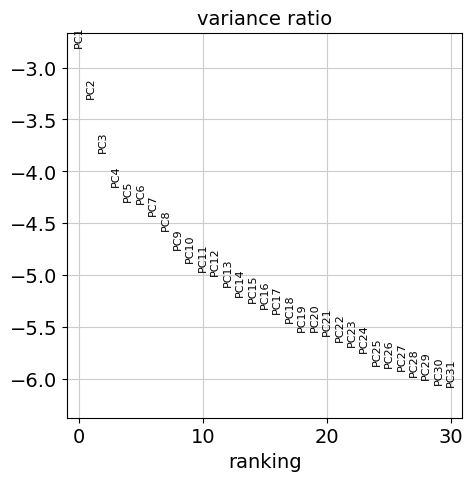

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
# sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)

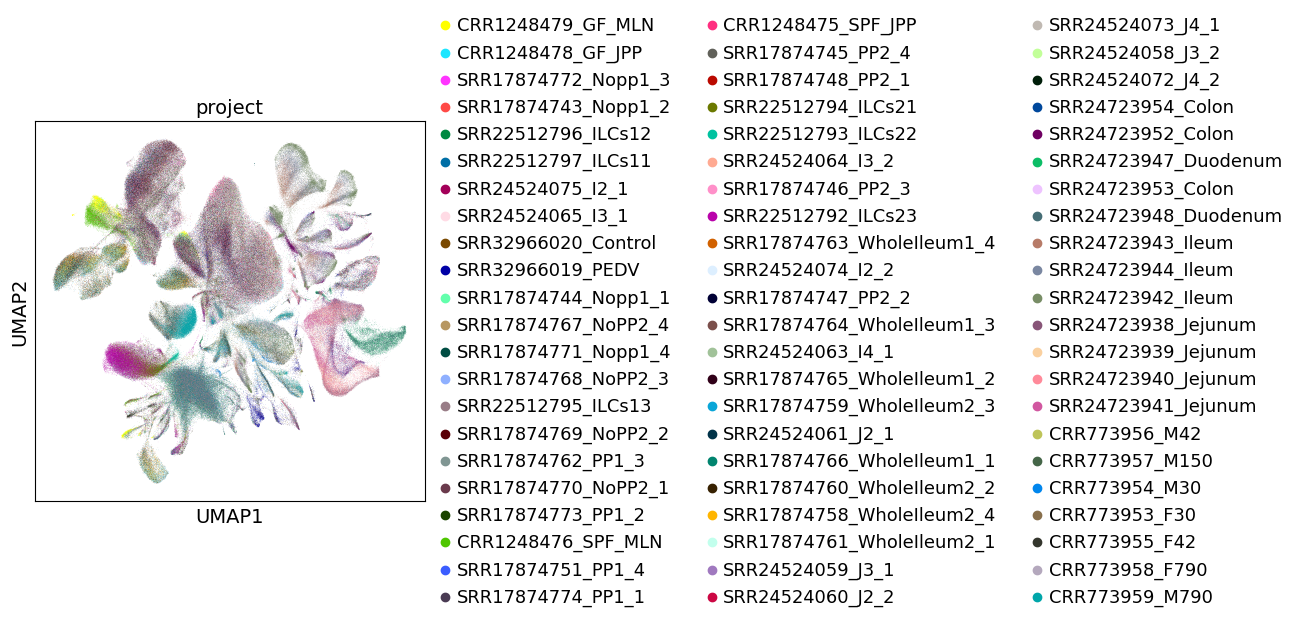

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata,color='project')

In [ ]:
adata=adata.raw.to_adata()

In [ ]:
adata.write(reduction_file)

In [36]:
import scvi

In [ ]:
adata=sc.read_h5ad(reduction_file)

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 616557 × 2571
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'project_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.layers['counts'] = adata.X.copy()

/tmp/ipykernel_1685338/1155977868.py:1: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X.copy()


In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["project"]
                             )
model = scvi.model.SCVI(adata,
                        n_layers=2,
                        n_latent = 30,
                        gene_likelihood="nb")
model.train() #may take a while without GPU

/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /disk221/software/miniconda3/envs/labBase/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HP

Training:   0%|          | 0/13 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=13` reached.


In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

/tmp/ipykernel_1685338/2433289105.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


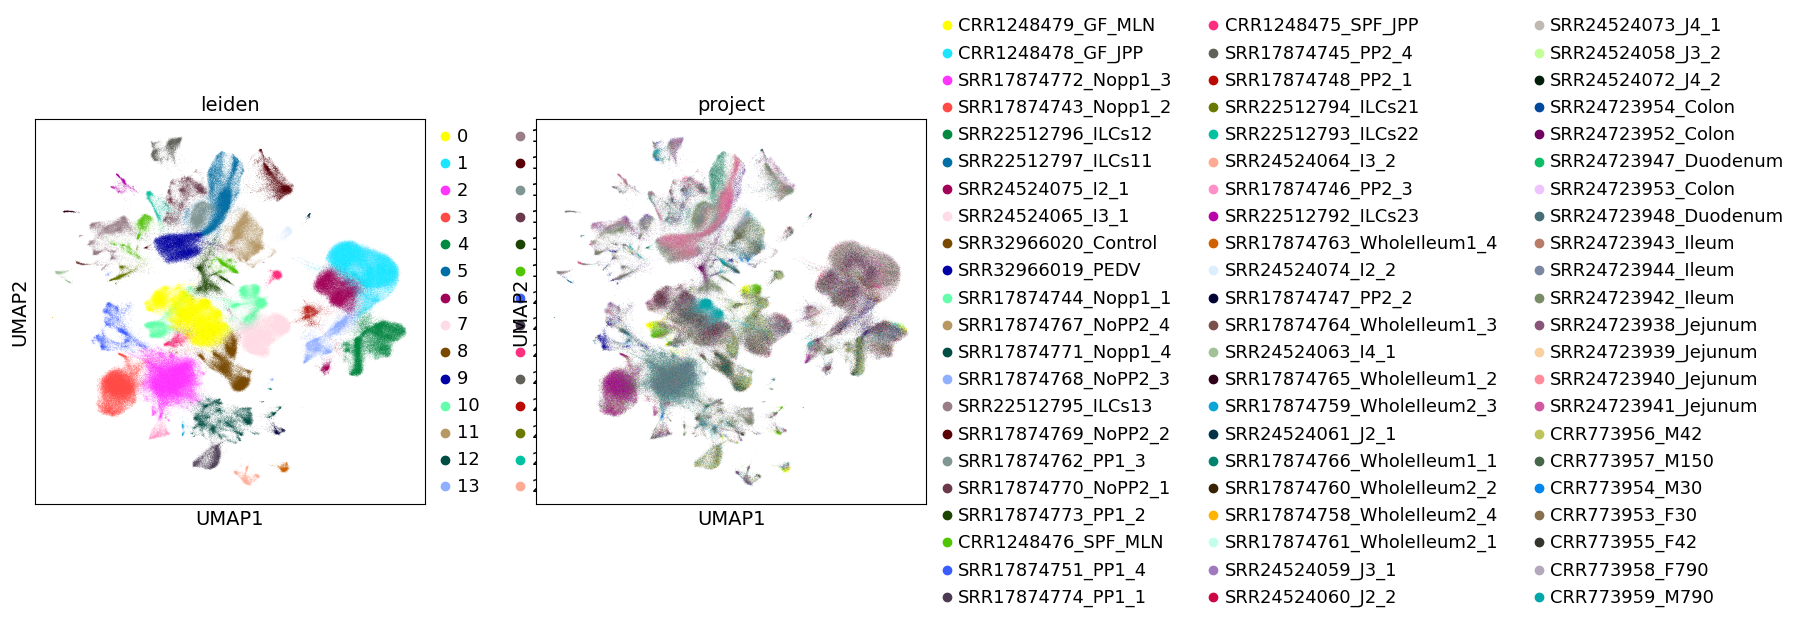

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden','project'])

In [ ]:
adata.write(scVI_file)

In [ ]:
adata=sc.read_h5ad(scVI_file)

In [ ]:
adata=adata.raw.to_adata()

In [ ]:
import celltypist
import time

In [ ]:
predictions = celltypist.annotate(adata, model = '/disk212/yupf/database/scRNA-seq/auto_anno/model/Lineage.pkl', majority_voting = True,over_clustering='leiden')
adata = predictions.to_adata()

🔬 Input data has 616557 cells and 25238 genes
🔗 Matching reference genes in the model
🧬 2232 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [ ]:
adata

AnnData object with n_obs × n_vars = 616557 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'project_colors', 'umap', 'majority_voting_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.tl.leiden(adata, resolution = 1.0, key_added='leiden_1.0')

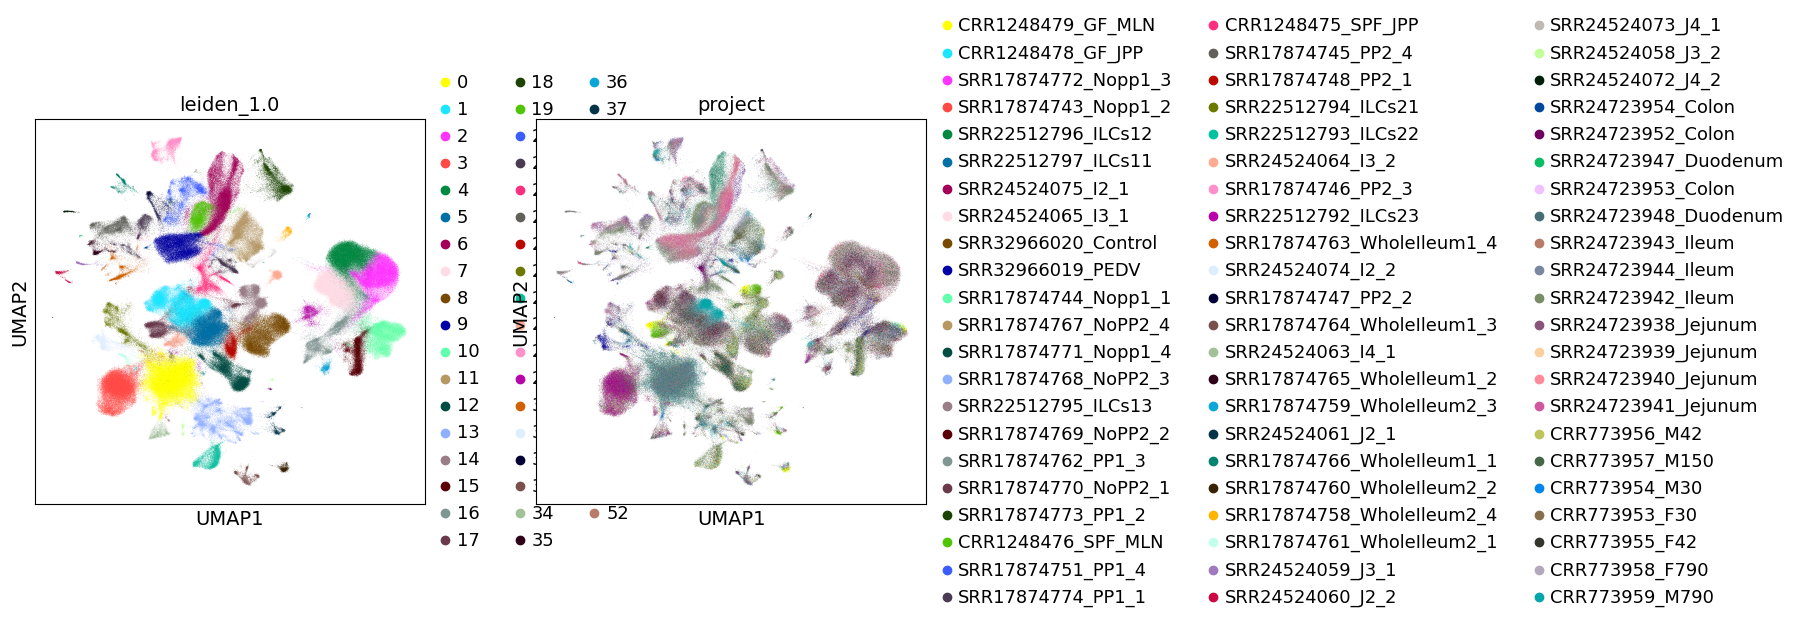

In [ ]:
sc.pl.umap(adata, color=['leiden_1.0', 'project'])

In [ ]:
predictions = celltypist.annotate(adata, model = '/disk212/yupf/database/scRNA-seq/auto_anno/model/Lineage.pkl', majority_voting = True,over_clustering='leiden_1.0')
adata = predictions.to_adata()

🔬 Input data has 616557 cells and 25238 genes
🔗 Matching reference genes in the model
🧬 2232 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


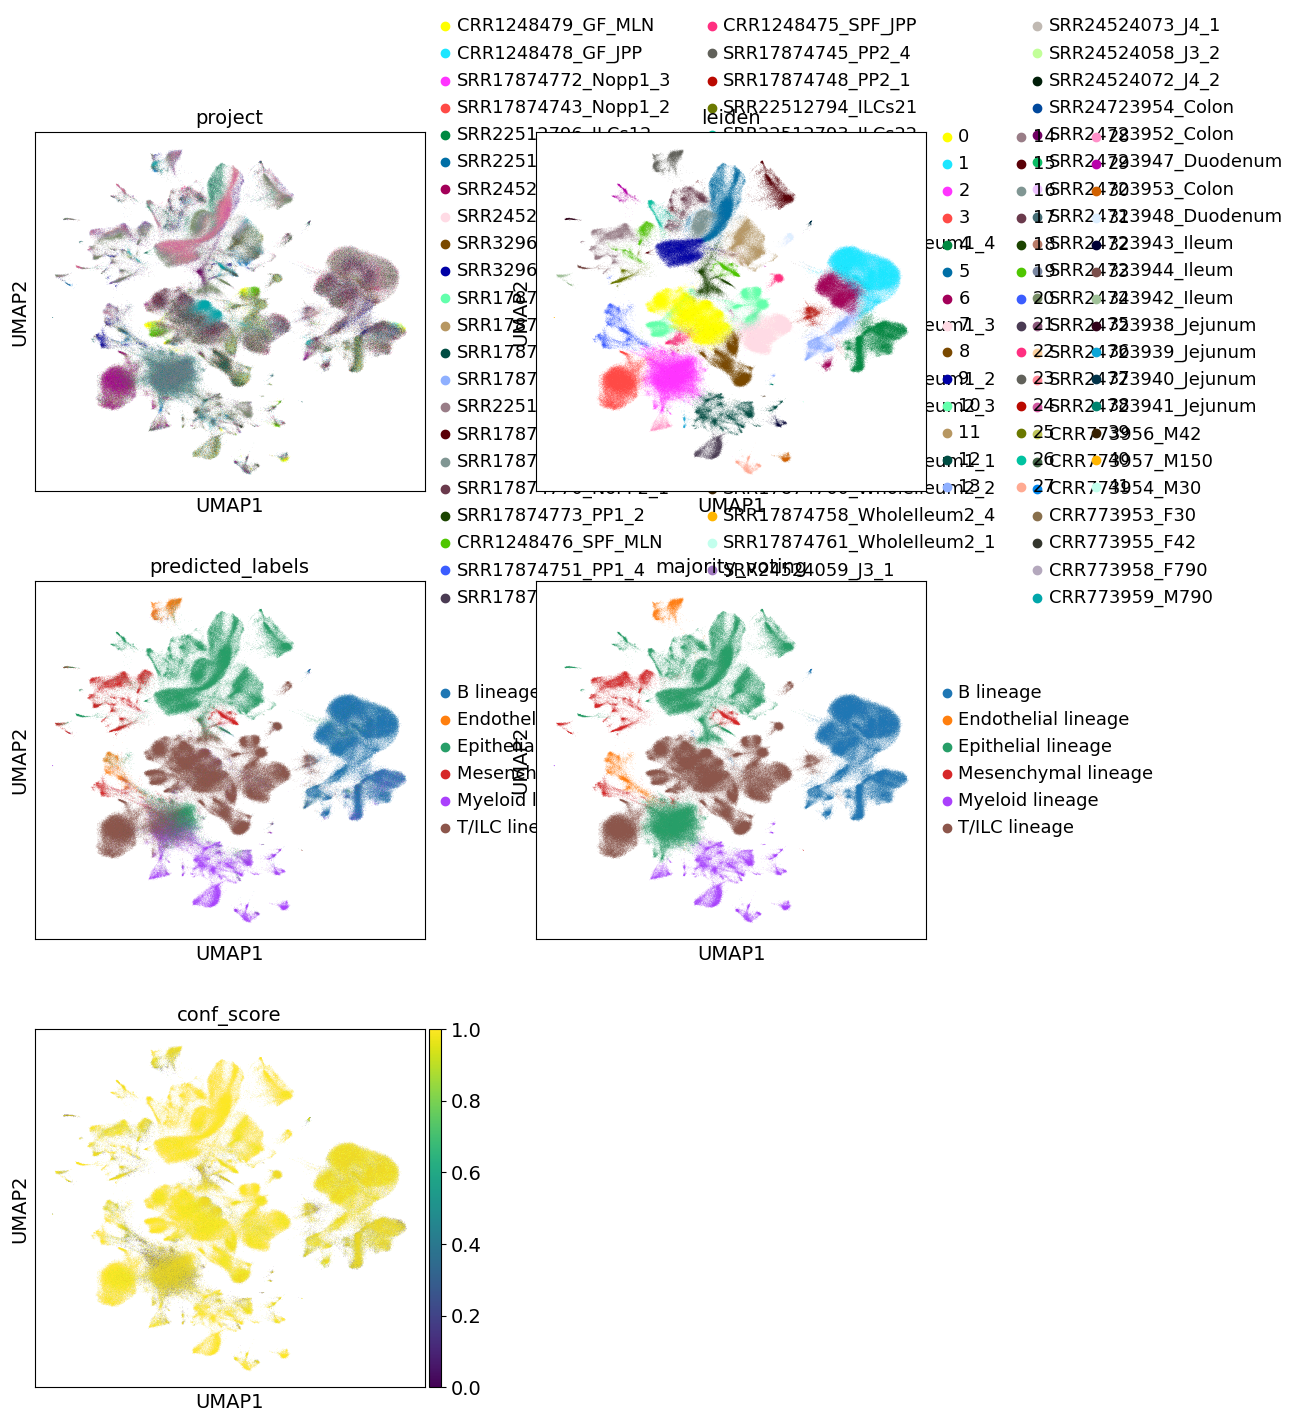

In [ ]:
sc.pl.umap(adata,color=['project','leiden','predicted_labels','majority_voting','conf_score'],ncols=2)

In [ ]:
subset=adata[adata.obs['conf_score']<0.8]

In [ ]:
subset

View of AnnData object with n_obs × n_vars = 59981 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'project_colors', 'umap', 'majority_voting_colors', 'predicted_labels_colors', 'leiden_1.0', 'leiden_1.0_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

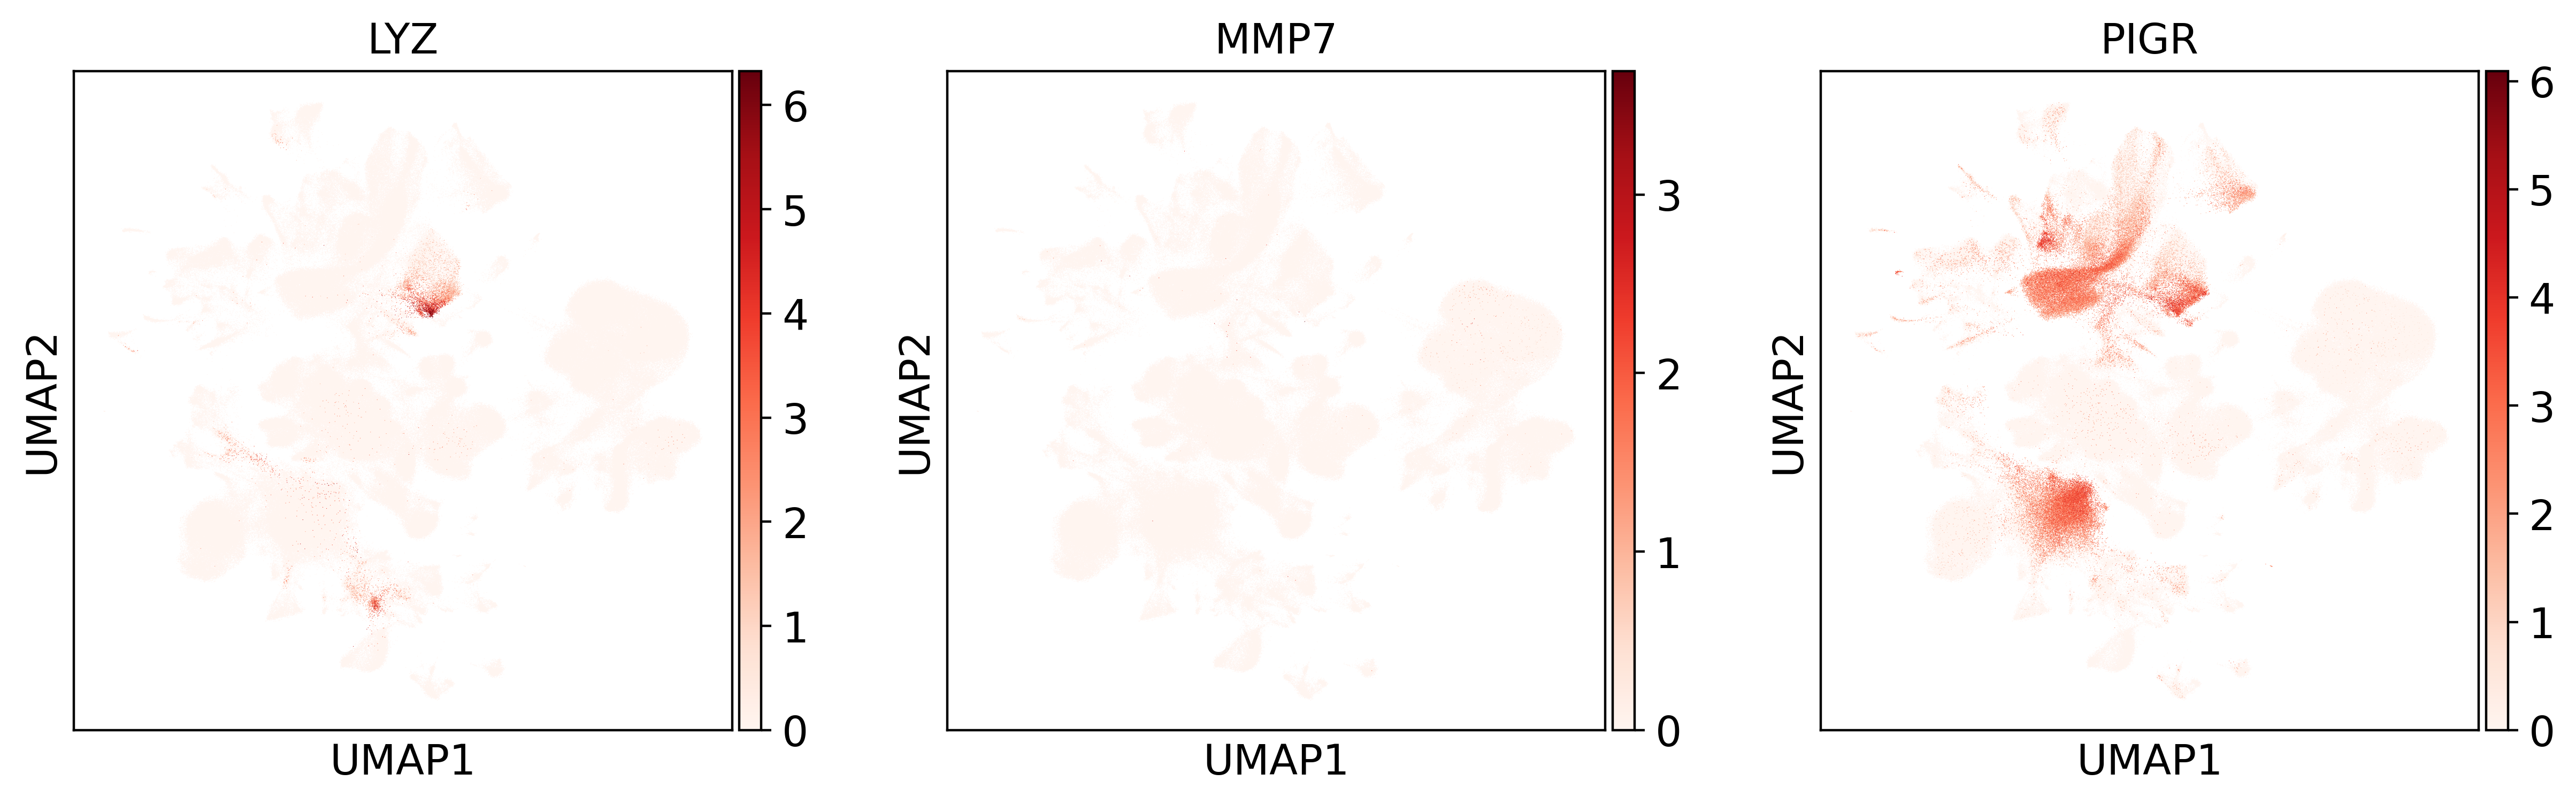

In [34]:
sc.pl.umap(extend,color=['LYZ','MMP7','PIGR'],color_map='Reds')

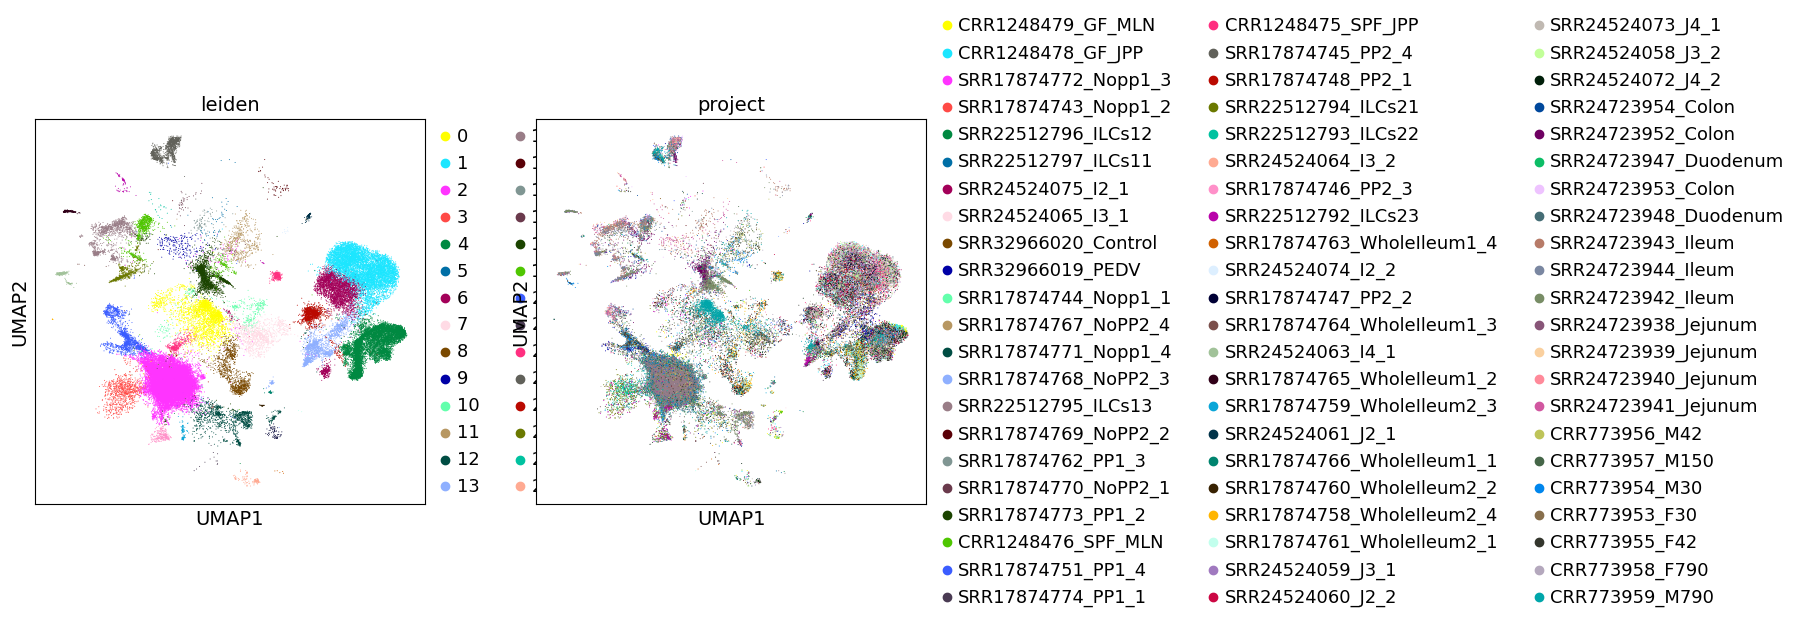

In [ ]:
sc.pl.umap(subset,color=['leiden'])

In [ ]:
celltypist_file='./IPGCA_extend_celltypist.h5ad'

In [ ]:
adata.write(celltypist_file)

#### PlanA：Ingest IPGCA extend into core by scArches

In [2]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [3]:
import sys
import scanpy as sc
import numpy as np
import pandas as pd
import scarches as sca
import scvi
import anndata as ad
from scipy import sparse
import gdown
import gzip
import shutil
import urllib.request

 captum (see https://github.com/pytorch/captum).


In [4]:
ref_model_dir_prefix = "./"  # directory in which to store the reference model directory
surgery_model_dir_prefix = (
    "./"  # directory in which to store the surgery model directory
)
path_reference_emb = (
    "/disk212/yupf/database/scRNA-seq/NewAtlas/atlas_level3_v2.h5ad"  # path to reference embedding to be created
)
path_query_data = "./IPGCA_extend_celltypist.h5ad"  # input test query data
# don't change the following paths:
ref_model_dir = os.path.join(
    ref_model_dir_prefix, "IPGCA_reference_model"
)  # don't change this
surgery_model_dir = os.path.join(
    surgery_model_dir_prefix, "surgery_model"
)  # don't change this

Create core SCVI model and train it on reference dataset

In [16]:
core=sc.read_h5ad(path_reference_emb)

In [6]:
var_select = core.var.highly_variable_nbatches > 20
var_genes = var_select.index[var_select]
len(var_genes)

3539

In [7]:
core.raw = core
# core = core[:, core.var.highly_variable]
core = core[:, var_genes]

In [8]:
core=core.copy()

In [9]:
condition_key='project'
cell_type_key='CellType'
unlabeled_category='unknown'

In [11]:
sca.models.SCANVI.setup_anndata(core, batch_key=condition_key, labels_key=cell_type_key,unlabeled_category=unlabeled_category)

/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [11]:
vae_epochs = 500

early_stopping_kwargs_scanvi = {
    "early_stopping": True,  # 启用早停机制
    "early_stopping_monitor": "elbo_validation",  # 监控的指标
    "early_stopping_min_delta": 0.001,  # 最小改进阈值
    "early_stopping_patience": 10,  # 耐心值
    "early_stopping_mode": "min",  # 模式（因为 ELBO 是越小越好）
    "early_stopping_warmup_epochs": 0,  # 热身周期
}

In [18]:
vae = sca.models.SCANVI(
    core,
    unlabeled_category,
    n_layers=2,
    n_latent = 30, # to allow for capturing more heterogeneity
    encode_covariates=True,
    deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none",
    gene_likelihood="nb", # because we have UMI data
    # use_cuda=True #to use GPU
)

In [19]:
print("Labelled Indices: ", len(vae._labeled_indices))
print("Unlabelled Indices: ", len(vae._unlabeled_indices))

Labelled Indices:  589101
Unlabelled Indices:  0


In [28]:
vae.train(
    max_epochs=vae_epochs,
    check_val_every_n_epoch=1,
    **early_stopping_kwargs_scanvi
)

INFO     Training for 500 epochs.                                                                                  


INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/disk221/sof

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Monitored metric elbo_validation did not improve in the last 10 records. Best score: 991.228. Signaling Trainer to stop.


In [30]:
vae.save(ref_model_dir, overwrite=True)

In [10]:
vae = sca.models.SCANVI.load(
   ref_model_dir, core
)  # if already trained

INFO: Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
INFO:lightning.pytorch.utilities.rank_zero:Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File ./IPGCA_reference_model/model.pt already downloaded                                                  


/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /disk221/software/miniconda3/envs/labBase/lib/python ...
/disk221/software/miniconda3/envs/labBase/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [11]:
vae.registry_["setup_args"]

{'labels_key': 'CellType',
 'unlabeled_category': 'unknown',
 'layer': None,
 'batch_key': 'project',
 'size_factor_key': None,
 'categorical_covariate_keys': None,
 'continuous_covariate_keys': None,
 'use_minified': True}

In [14]:
core

AnnData object with n_obs × n_vars = 589101 × 3539
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project', 'age'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'stage_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [13]:
vae.registry_

{'scvi_version': '1.3.2',
 'model_name': 'SCANVI',
 'setup_args': {'labels_key': 'CellType',
  'unlabeled_category': 'unknown',
  'layer': None,
  'batch_key': 'project',
  'size_factor_key': None,
  'categorical_covariate_keys': None,
  'continuous_covariate_keys': None,
  'use_minified': True},
 'field_registries': defaultdict(dict,
             {'X': {'data_registry': {'attr_name': 'X', 'attr_key': None},
               'state_registry': {'n_obs': 589101,
                'n_vars': 3539,
                'column_names': array(['A1CF', 'A4GNT', 'ABCA1', 'ABCA7', 'ABCB9', 'ABCC1', 'ABCC10', ...,
                       'ZP3', 'ZSCAN20', 'ZSCAN29', 'ZSWIM3', 'ZSWIM4', 'ZSWIM5',
                       'ssc-mir-6782'], dtype=object)},
               'summary_stats': {'n_vars': 3539, 'n_cells': 589101}},
              'batch': {'data_registry': {'attr_name': 'obs',
                'attr_key': '_scvi_batch'},
               'state_registry': {'categorical_mapping': array(['CNP0002165', 'DUR_C

prepare extend data

#### PlanB：celltypist+scANVI

In [19]:
extend

AnnData object with n_obs × n_vars = 616557 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'predicted_labels_colors', 'project_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [21]:
import celltypist

In [22]:
predictions = celltypist.annotate(extend, model = '/disk212/yupf/database/web/streamlit/asset/pkl/IPGCA_celltypes.pkl', majority_voting = True,over_clustering='leiden_1.0')
extend = predictions.to_adata()

In [23]:
extend

AnnData object with n_obs × n_vars = 616557 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'predicted_labels_colors', 'project_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

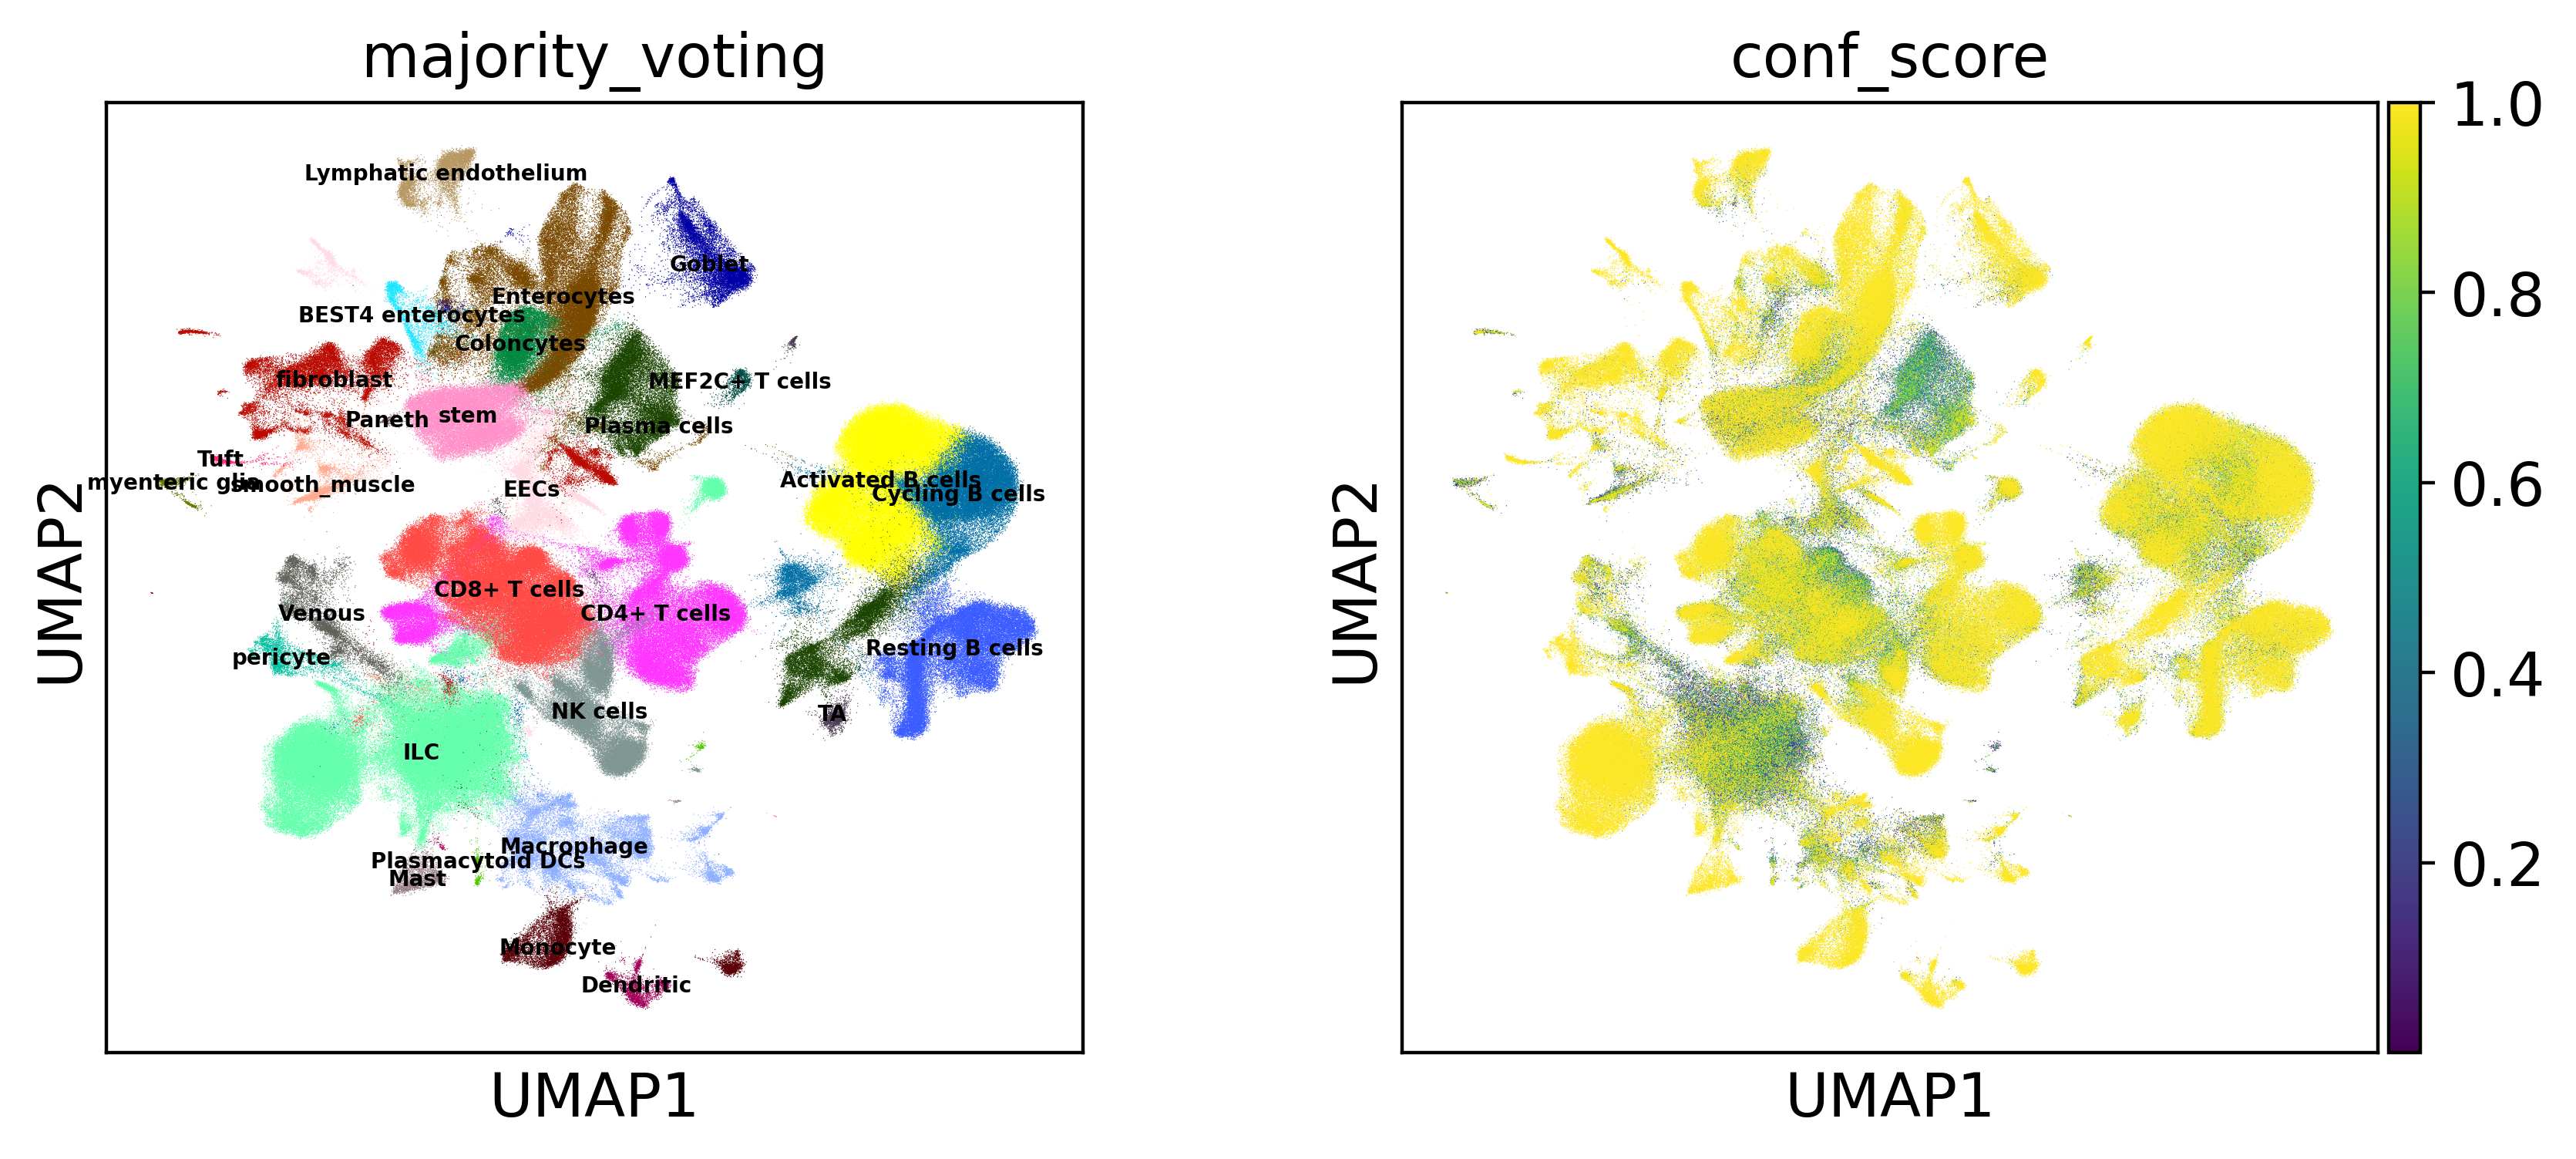

In [29]:
sc.pl.umap(extend,color=['majority_voting','conf_score'],legend_loc='on data',legend_fontsize=5)

In [30]:
extend

AnnData object with n_obs × n_vars = 616557 × 25238
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'leiden_1.0'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'predicted_labels_colors', 'project_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'